# Scraping a Table with Beautiful Soup


Let's move onto a real example.  Take a look at this page.  It's a leaderboard of entrants to the competition I run at the end of my robotics course.

https://www.thinkcreatelearn.co.uk/resources/web-scraping-samples/sample4.html


How can we extract data from this table into a Pandas dataframe?

### 1. Understand the page structure
The first thing we need to do is to understand how the data on the page is organised.  Go to the web page, right-click and select View Page Source. You will see some HTML code.  You need to find the table data in the HTML code.  Search for some text from the start of the table.  E.g. searching for 'Jurgen' shows this:


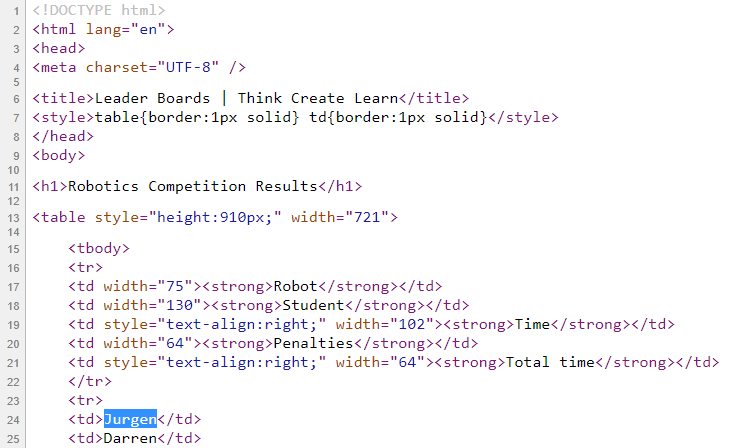

You can see the table header in rows 16 to 22 and the first row of data from row 23 onwards.

### 2. Write some code to deconstruct the page 
We need to write some code using Beautiful Soup to extract this data.  Have a look at scrape_helper.py for some code that reads from an HTML table.

In [3]:
# Load the libraries we need
from bs4 import *
import urllib3
import pandas as pd
from scrape_helper import *

### 3. Pull the data from the web page and call the page deconstruction code 
Now we can make an HTTP request to pull the web page data (just like you did when you view the page source in the browser, but this time using code).  We can then use the code above to extract the table:

In [4]:
# This is the web page we will pull data from
url = "https://www.thinkcreatelearn.co.uk/resources/web-scraping-samples/sample4.html"

# Pull the date from the web page
http = urllib3.PoolManager()
response = http.request('GET', url)

# Create a Beautiful Soup object, passing in the page data
soup = BeautifulSoup(response.data, "lxml")

# Find the first table in the document using our function above
table = soup.find('table')
df = tableToDataFrame(table)
df.head()

,Index,Robot,Student,Time,Penalties,Total time
0,,Jurgen,Darren,00:22,0,00:22
1,,Gemma,Joe W (driving Ali’s robot!),00:19,1,00:22
2,,Clunk,Zack,00:21,1,00:24
3,,Raptor,Darren,00:27,0,00:27
4,,Norbert,Leo,00:28,0,00:28
